In [1]:
! ls data

ELUT1.fa          ETAL_bond.fasta   arvicolinae.fasta rodentia.fasta
ELUT2.fa          ETAL_female.fasta cricetidae.fasta


# Helper functions and classes

In [2]:
from dataclasses import dataclass
from typing import TextIO, Iterable, List, Optional


@dataclass
class FASTASequence:
    title: str
    sequence: str


def parse_fasta(io: TextIO) -> Iterable[FASTASequence]:
    curr_title: Optional[str] = None
    curr_sequence_parts: List[str] = []

    def flush() -> Iterable[FASTASequence]:
        if curr_title:
            yield FASTASequence(title=curr_title, sequence="".join(curr_sequence_parts).upper())

    for line in io:
        if line.startswith(">"):
            yield from flush()
            curr_title = line[1:].strip()
            curr_sequence_parts = []
        else:
            curr_sequence_parts.append(line.strip())

    yield from flush()

# Scatter plot of GC content of different rodent mtDNAs

data/ELUT_female.fasta 0.43119919302201387
data/ELUT_female.fasta 0.4299115359496527
data/ELUT_female.fasta 0.43119919302201387
data/ELUT_female.fasta 0.4299115359496527
data/ELUT_female.fasta 0.43119919302201387
data/ELUT_female.fasta 0.4299115359496527


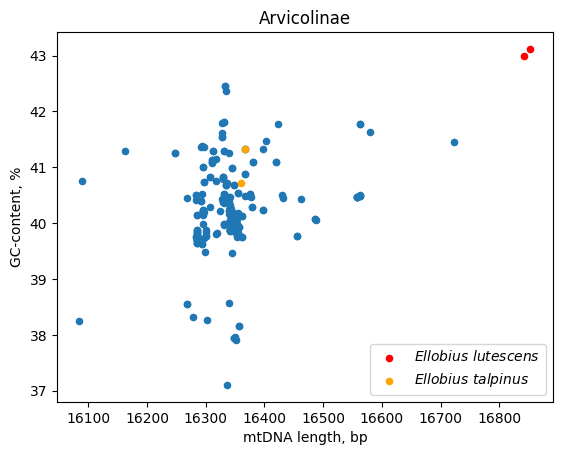

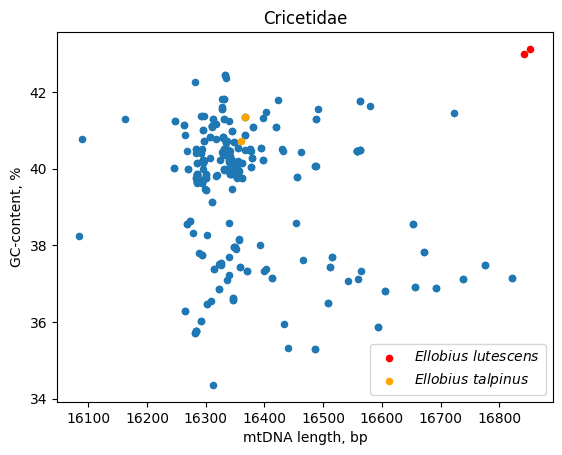

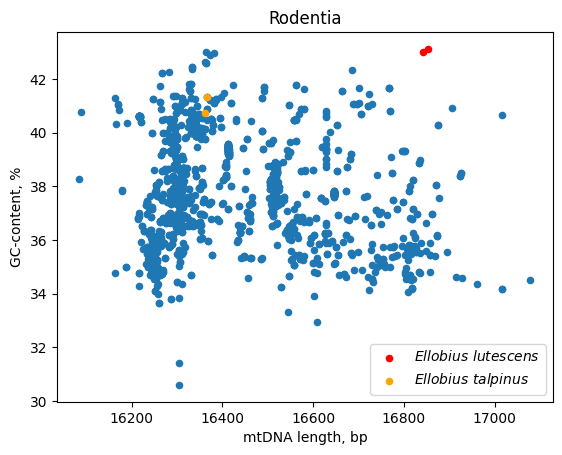

In [6]:
from matplotlib import pyplot as plt
import os

def gc_content(seq):
    return (seq.count("G") + seq.count("C")) / len(seq)

for filename, taxon in [
    ("data/arvicolinae.fasta", "Arvicolinae"), 
    ("data/cricetidae.fasta", "Cricetidae"), 
    ("data/rodentia.fasta", "Rodentia"),
]:
    plt.figure()
    plt.title(taxon)
    with open(filename) as f:
        seqs = parse_fasta(f)
        xs, ys = zip(*(
            (len(seq.sequence), 100*gc_content(seq.sequence)) 
            for seq in seqs 
            if len(seq.sequence) > 16000
            and "gene" not in seq.title 
            and "D-loop" not in seq.title
            and "control region" not in seq.title
            and "RNA-Asp" not in seq.title
            and "antisense RNA" not in seq.title
        ))
        plt.scatter(xs, ys, s=20)

    xs, ys = [], []
    for filename in ["data/ELUT_female.fasta", "data/ELUT_bond.fasta"]:
        with open(filename) as f:
            seq, = parse_fasta(f)
        xs.append(len(seq.sequence))
        ys.append(100*gc_content(seq.sequence))
        print(name, gc_content(seq.sequence))
    plt.scatter(xs, ys, s=20, color="r", label="$\it{Ellobius\ lutescens}$")
    xs, ys = [], []
    for filename in ["data/ETAL_female.fasta", "data/ETAL_bond.fasta"]:
        with open(filename) as f:
            seq, = parse_fasta(f)
        xs.append(len(seq.sequence))
        ys.append(100*gc_content(seq.sequence))
    plt.scatter(xs, ys, s=20, color="orange", label="$\it{Ellobius\ talpinus}$")
    plt.xlabel("mtDNA length, bp")
    plt.ylabel("GC-content, %")
    plt.legend();